# Predictions on growth of reported death by Novel Coronavirus (2019-nCoV)
                      By Bohan updated on April 21, 2020  
## Goal: Compare deaths within Canada with other countries.

## Method: 
### Draw logtithmic graph similar to slide 6 of Ontario's projections released on April 3, 2020
(URL: https://www.cbc.ca/news/canada/toronto/ontario-covid-projections-1.5519575)

## Data: 
Publically available source from 2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE  
https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series


## Notes: 
### This is NOT official projection.
### This notebook can be used for other provinces or countries by changing names in the code.

## Summary: 
### 1. The number of death in US started to show decreasing trend.
### 2.Within Canada, the death rate is slowing down in all regions and daily increase is below 15%.
### 3. In summary, the death rate is likely to continue to drop in Canada and US.
  

In [1]:
import numpy as np;  # useful for many scientific computing in Python
import pandas as pd; # primary data structure library
import scipy as sp; # for statistical tests
import matplotlib.pyplot as plt; # for plotting
from matplotlib.ticker import ScalarFormatter # for fomat log axis

In [2]:
# data from 2019 Novel Coronavirus COVID-19 (2019-nCoV) Data Repository by Johns Hopkins CSSE
# https://github.com/CSSEGISandData/COVID-19/blob/master/csse_covid_19_data/csse_covid_19_time_series/time_series_19-covid-Confirmed.csv

df = pd.read_csv('https://raw.githubusercontent.com/CSSEGISandData/COVID-19/master/csse_covid_19_data/csse_covid_19_time_series/time_series_covid19_deaths_global.csv'); # import file
df.head()

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20
0,NaN,Afghanistan,33.0000,65.0000,0,0,0,0,0,0,...,30,30,33,36,36,40,42,43,47,50
1,NaN,Albania,41.1533,20.1683,0,0,0,0,0,0,...,26,26,26,26,26,27,27,27,27,28
2,NaN,Algeria,28.0339,1.6596,0,0,0,0,0,0,...,364,367,375,384,392,402,407,415,419,425
3,NaN,Andorra,42.5063,1.5218,0,0,0,0,0,0,...,35,35,36,37,37,37,37,40,40,40
4,NaN,Angola,-11.2027,17.8739,0,0,0,0,0,0,...,2,2,2,2,2,2,2,2,2,2


In [3]:
# I will use data from the date when reached 5 deaths
# define a function to do it
def find5(s):
    # s: pandas series containing number of death cases
    
    for i in range(len(s.to_numpy())):
        if s.to_numpy()[i] >= 5:
            s2 = s[i:];
            break   
    return s2

In [4]:
# US example
US_sum = df[df['Country/Region'] == 'US'].iloc[:,4:].sum(axis=0);
# start with the date when reached 5 deaths
US_sum = find5(US_sum);

# Spain example
Spain_sum = df[df['Country/Region'] == 'Spain'].iloc[:,4:].sum(axis=0);
# start with the date when reached 5 deaths
Spain_sum = find5(Spain_sum);

# Germany example
Germany_sum = df[df['Country/Region'] == 'Germany'].iloc[:,4:].sum(axis=0);
# start with the date when reached 5 deaths
Germany_sum = find5(Germany_sum);

# France example
France_sum = df[df['Country/Region'] == 'France'].iloc[:,4:].sum(axis=0);
# start with the date when reached 5 deaths
France_sum = find5(France_sum);

# United Kingdom example
UK_sum = df[df['Country/Region'] == 'United Kingdom'].iloc[:,4:].sum(axis=0);
# start with the date when reached 5 deaths
UK_sum = find5(UK_sum);

# Italy example
Italy_sum = df[df['Country/Region'] == 'Italy'].iloc[:,4:].sum(axis=0);
# start with the date when reached 5 deaths
Italy_sum = find5(Italy_sum);

In [5]:
# Canada
Canada = df[df['Country/Region'] == 'Canada'];
# find sum for the entire country
Canada_sum = Canada.iloc[:,4:].sum(axis=0);
# start with the date when reached 5 deaths
Canada_sum = find5(Canada_sum);
# remove provinces did not reach 5 deaths
Canada = Canada[Canada.iloc[:,-1] > 5]
Canada

,Province/State,Country/Region,Lat,Long,1/22/20,1/23/20,1/24/20,1/25/20,1/26/20,1/27/20,...,4/17/20,4/18/20,4/19/20,4/20/20,4/21/20,4/22/20,4/23/20,4/24/20,4/25/20,4/26/20
35,Alberta,Canada,53.9333,-116.5765,0,0,0,0,0,0,...,50,51,51,59,61,66,68,72,73,73
36,British Columbia,Canada,49.2827,-123.1207,0,0,0,0,0,0,...,77,78,81,82,87,90,94,98,100,100
38,Manitoba,Canada,53.7609,-98.8139,0,0,0,0,0,0,...,5,5,5,6,6,6,6,6,6,6
42,Ontario,Canada,51.2538,-85.3232,0,0,0,0,0,0,...,524,564,591,624,694,762,806,862,916,960
44,Quebec,Canada,52.9399,-73.5491,0,0,0,0,0,0,...,688,688,820,939,1044,1134,1243,1340,1446,1516


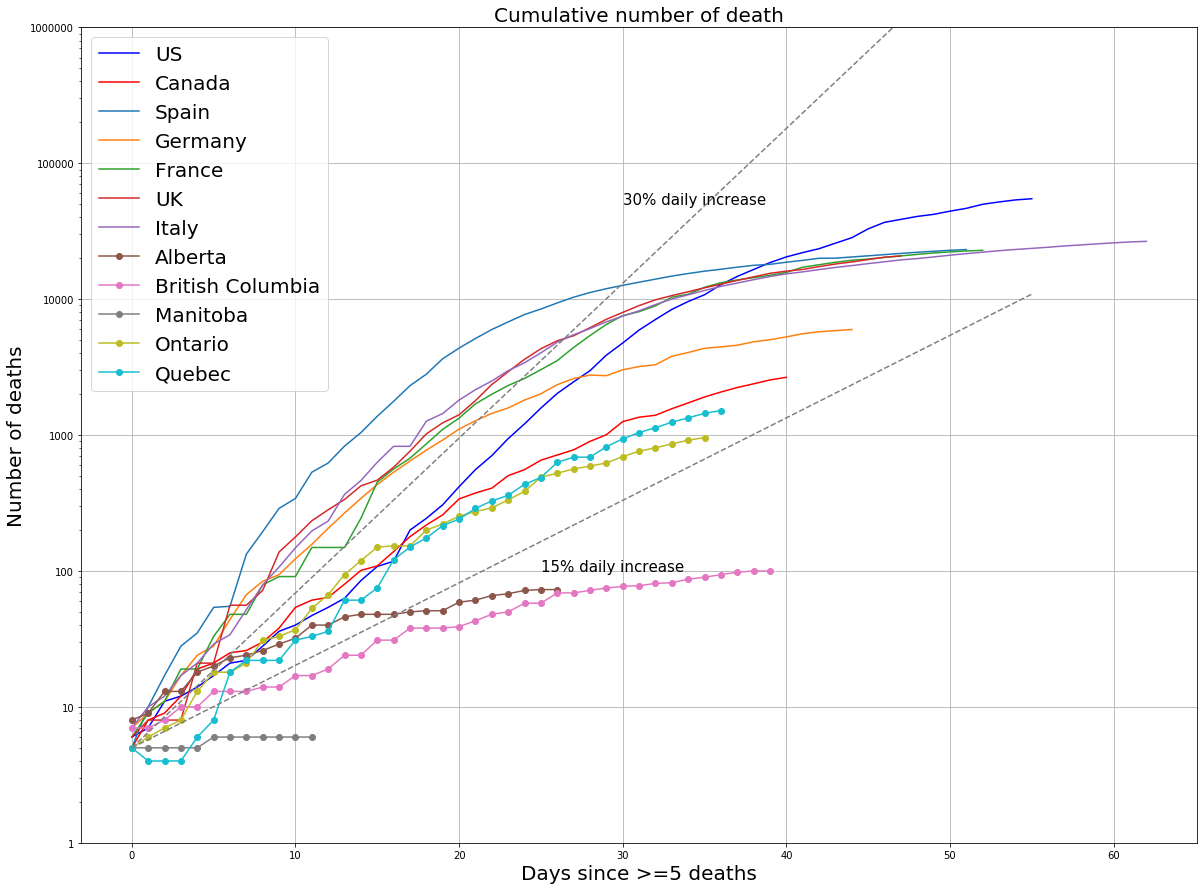

In [8]:
fig = plt.figure(figsize=(20,15));
ax = fig.add_subplot(111);

# plot counties
plt.semilogy(US_sum.to_numpy(),'b', label='US');
plt.semilogy(Canada_sum.to_numpy(),'r', label='Canada');
plt.semilogy(Spain_sum.to_numpy(), label='Spain');
plt.semilogy(Germany_sum.to_numpy(), label='Germany');
plt.semilogy(France_sum.to_numpy(), label='France');
plt.semilogy(UK_sum.to_numpy(), label='UK');
plt.semilogy(Italy_sum.to_numpy(), label='Italy');

# plot for each Province in a loop
for i in range(len(Canada.index)):
    po = find5(Canada.iloc[i,4:]);
    plt.semilogy(po.to_numpy(),'-o', label=Canada.iloc[i,0]);
    
# plot guide lines
v = np.arange(0,len(US_sum.index));
plt.plot(5*(1.+.15)**v, color='grey', linestyle='dashed');
plt.plot(5*(1.+.3)**v, color='grey', linestyle='dashed');

ax.text(30, 50000, r'30% daily increase', fontsize=15);
ax.text(25, 100, r'15% daily increase', fontsize=15);
    
plt.legend(fontsize=20);
plt.ylabel('Number of deaths', fontsize=20);
plt.title('Cumulative number of death', fontsize=20);
plt.xlabel('Days since >=5 deaths', fontsize=20);
ax.yaxis.set_major_formatter(ScalarFormatter());
plt.ylim([1,10**6]);
plt.grid(True);
plt.show();